In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [22]:
msg = pd.read_csv("../input/sms-spam-collection-dataset/spam.csv")

In [8]:
msg.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
msg= msg.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [34]:
msg= msg.set_axis(['label', 'message'], axis=1)

In [35]:
msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:xlabel='label', ylabel='count'>

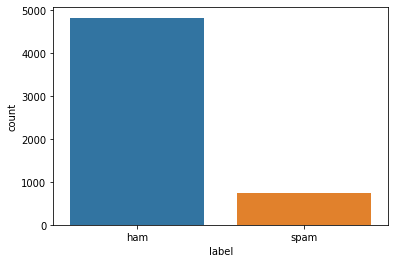

In [67]:

import seaborn as sns

sns.countplot(data=msg, x="label")

THERE CAN BE SOME OVERFITTING IN THE HAM PREDICTION AS THOSE VALUES ARE MORE

In [51]:
#preprocessing libraries for nlp
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [52]:
wordnet = WordNetLemmatizer()
ps      = PorterStemmer()
len(msg)

5572

In [53]:
corpus = []
for i in range(0, len(msg)):
    review = re.sub('[^a-zA-Z]', ' ', msg['message'][i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [68]:
#BAg of Words
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(max_features =1500)

x1 = cv1.fit_transform(corpus).toarray()

In [101]:
#Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

cv2 = TfidfVectorizer()

x2 = cv2.fit_transform(corpus).toarray()

In [102]:
#converting spam to 1 and ham to 0
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

msg['label']= label_encoder.fit_transform(msg['label'])
    
        

In [78]:
msg.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
y= msg['label']

In [135]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.15, random_state=0)


USING NAIVE BAYES MODEL

In [136]:

from sklearn.naive_bayes import MultinomialNB
spam_det_model=MultinomialNB().fit(x_train, y_train)

In [137]:
preds = spam_det_model.predict(x_test)

In [138]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test, preds)
confusion

array([[699,   9],
       [  6, 122]])

In [139]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
accuracy

0.9820574162679426

In [140]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,preds))

0.017942583732057416
